In [106]:
import numpy as np
import pandas as pd

In [107]:
column_renames = {
  "notering": "positie",
  "nr.": "positie",
  "jaar": "jaartal"
}

In [108]:
# https://www.nporadio2.nl/top2000?edition=top-2000-van-2022-12-25

In [109]:
folder = "data"
name = "Top 2000 2024.xlsx"
full = pd.DataFrame()
start_year = 2020
end_year = 2024

for year in range(start_year, end_year+1):
    df = pd.read_excel(f'{folder}/Top 2000 {year}.xlsx')
    if len(df) > 2000:
        df = df.iloc[1:]
    df.columns = [str.lower(col) for col in df.columns]
    df.rename(columns=column_renames, inplace=True)
    print(df.columns)
    df['lijst_jaar'] = year
    df['positie'] = df['positie'].astype(int)
    df['jaartal'] = df['jaartal'].astype(int)
    df['lijst_jaar'] = df['lijst_jaar'].astype(int)
    display(df.head(1))
    full = pd.concat([full, df], ignore_index=True)
full

Index(['positie', 'artiest', 'titel', 'jaartal'], dtype='object')


,positie,artiest,titel,jaartal,lijst_jaar
0,1,Danny Vera,Roller Coaster,2019,2020


Index(['positie', 'titel', 'artiest', 'jaartal'], dtype='object')


,positie,titel,artiest,jaartal,lijst_jaar
1,1,Bohemian Rhapsody,Queen,1975,2021


Index(['positie', 'titel', 'artiest', 'jaartal'], dtype='object')


,positie,titel,artiest,jaartal,lijst_jaar
1,1,Bohemian Rhapsody,Queen,1975,2022


Index(['positie', 'titel', 'artiest', 'jaartal'], dtype='object')


,positie,titel,artiest,jaartal,lijst_jaar
0,1,Bohemian Rhapsody,Queen,1975,2023


Index(['positie', 'titel', 'artiest', 'jaartal'], dtype='object')


,positie,titel,artiest,jaartal,lijst_jaar
0,1,Bohemian Rhapsody,Queen,1975,2024


,positie,artiest,titel,jaartal,lijst_jaar
0,1,Danny Vera,Roller Coaster,2019,2020
1,2,Queen,Bohemian Rhapsody,1975,2020
2,3,Eagles,Hotel California,1977,2020
3,4,Billy Joel,Piano Man,1974,2020
4,5,Led Zeppelin,Stairway To Heaven,1971,2020
...,...,...,...,...,...
9995,1996,Dire Straits,Once Upon A Time In The West,1979,2024
9996,1997,Bruce Springsteen,Bobby Jean,1984,2024
9997,1998,Goldband,De Langste Nacht,2021,2024
9998,1999,R.E.M.,It's The End Of The World As We Know It (Album...,1987,2024


In [110]:
all_artists_top_10 = full[full['positie'] <= 10]['artiest'].unique()
all_artists_top_10, len(all_artists_top_10)

(array(['Danny Vera', 'Queen', 'Eagles', 'Billy Joel', 'Led Zeppelin',
        'Pearl Jam', 'Boudewijn de Groot', 'Coldplay', 'Pink Floyd',
        'David Bowie', 'Procol Harum', 'Golden Earring', 'Metallica',
        'Dermot Kennedy'], dtype=object),
 14)

In [111]:
df = full.copy()

In [112]:
artist_by_year = df.groupby(["artiest", 'lijst_jaar']).size().reset_index(name='count')

In [113]:
artist_counts = artist_by_year[artist_by_year["artiest"].isin(all_artists_top_10)]

In [114]:
artist_counts.sort_values(by="count", ascending=False)[:20]

,artiest,lijst_jaar,count
2822,Queen,2023,34
2821,Queen,2022,34
2820,Queen,2021,33
2823,Queen,2024,32
2819,Queen,2020,32
679,Coldplay,2022,20
681,Coldplay,2024,20
677,Coldplay,2020,20
680,Coldplay,2023,20
819,David Bowie,2020,19


In [115]:
# Reshape the data from long to wide format
artist_counts_wide = artist_counts.pivot(index='lijst_jaar', 
                                       columns='artiest', 
                                       values='count')

In [116]:
artist_counts[:10]

,artiest,lijst_jaar,count
383,Billy Joel,2020,9
384,Billy Joel,2021,10
385,Billy Joel,2022,10
386,Billy Joel,2023,9
387,Billy Joel,2024,10
488,Boudewijn de Groot,2020,10
489,Boudewijn de Groot,2021,10
490,Boudewijn de Groot,2022,10
491,Boudewijn de Groot,2023,9
492,Boudewijn de Groot,2024,10


In [117]:
t = df["lijst_jaar"].unique()

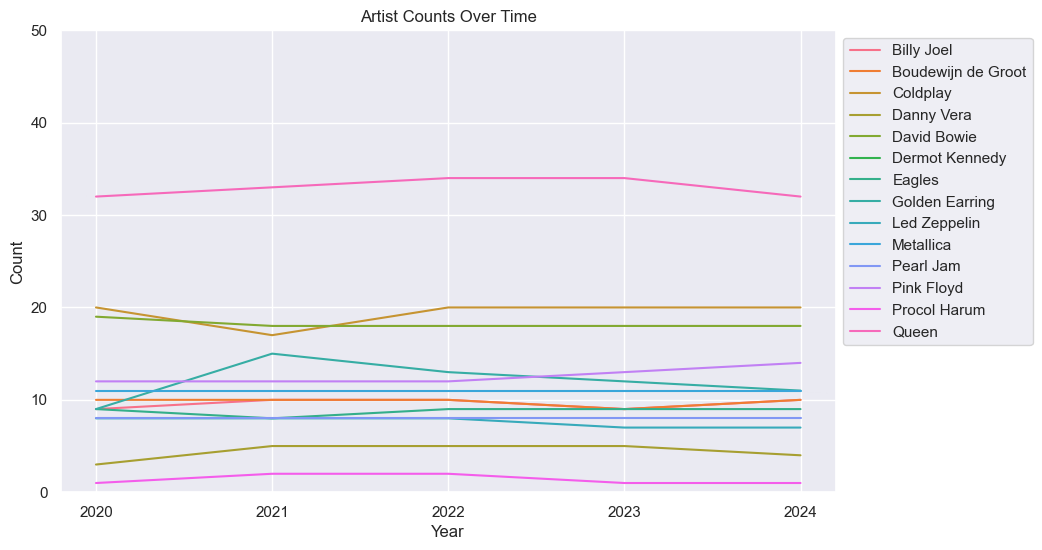

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
g = sns.lineplot(data=artist_counts, x="lijst_jaar", y="count", hue="artiest", ax=ax)

g.set_xticks(t)

# Add legend
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_ylim(0, 50)  # Adjust these numbers to your desired range

# Customize axes
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Artist Counts Over Time')

plt.show()

In [119]:
# Ontwikkeling van stem gedrag over de jaren
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
df['decade'] = pd.cut(df['jaartal'], bins=bins, labels=labels)
df[0:10]

,positie,artiest,titel,jaartal,lijst_jaar,decade
0,1,Danny Vera,Roller Coaster,2019,2020,2010s
1,2,Queen,Bohemian Rhapsody,1975,2020,1970s
2,3,Eagles,Hotel California,1977,2020,1970s
3,4,Billy Joel,Piano Man,1974,2020,1970s
4,5,Led Zeppelin,Stairway To Heaven,1971,2020,1970s
5,6,Pearl Jam,Black,1992,2020,1990s
6,7,Boudewijn de Groot,Avond,1997,2020,1990s
7,8,Coldplay,Fix You,2005,2020,2000s
8,9,Pink Floyd,Wish You Were Here,1975,2020,1970s
9,10,David Bowie,Heroes,1976,2020,1970s


In [120]:
decade_by_year = df.groupby(["decade", 'lijst_jaar']).size().reset_index(name='count')
decade_by_year[10:14]

/var/folders/np/sw3cwd7x6rv0llrv26d2w1s40000gn/T/ipykernel_56432/3533719879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_by_year = df.groupby(["decade", 'lijst_jaar']).size().reset_index(name='count')


,decade,lijst_jaar,count
10,1970s,2020,444
11,1970s,2021,441
12,1970s,2022,424
13,1970s,2023,416


In [121]:
decade_by_year['percentage'] = (decade_by_year['count'] / 2000) * 100

/Users/jeroen/Documents/Personal_Projects/top-2000 EDA/.venv/lib/python3.10/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


[<matplotlib.lines.Line2D object at 0x11b4e5db0>, <matplotlib.lines.Line2D object at 0x11b4ca3e0>, <matplotlib.lines.Line2D object at 0x11b4cb2e0>, <matplotlib.lines.Line2D object at 0x11b4ca320>, <matplotlib.lines.Line2D object at 0x11b5dcc70>, <matplotlib.lines.Line2D object at 0x11b5dd1b0>, <matplotlib.lines.Line2D object at 0x11b5dc4c0>, <matplotlib.lines.Line2D object at 0x11b5a2f80>] ['2010s', '1970s', '1990s', '2000s', '1980s', '1960s', '1950s', '2020s']


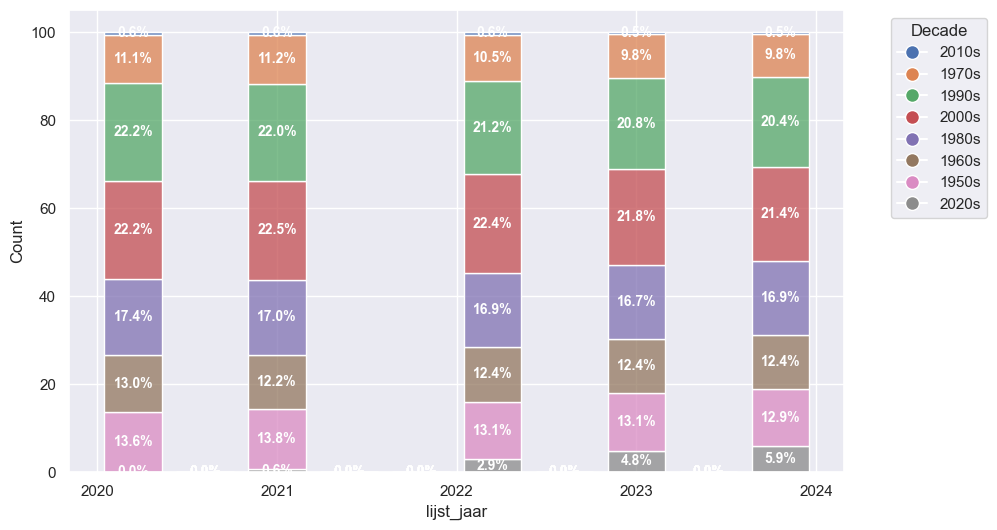

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
g = sns.histplot(data=decade_by_year, x='lijst_jaar', 
                weights='percentage',
                shrink=0.8,
                hue='decade', multiple='stack', ax=ax)

# Unique years for x-axis
unique_years = df['lijst_jaar'].unique()
# Set the x-ticks to be the unique years
g.set_xticks(unique_years)

# Add legend outside the plot
decades = df['decade'].unique()
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[i], markersize=10) for i, _ in enumerate(decades)]
labels = [decade for decade in decades]
print(handles, labels)
ax.legend(handles=handles, labels=labels, title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentage values
for c in g.containers:
    labels = [f'{w:.1f}%' for w in c.datavalues]
    g.bar_label(c, labels=labels, label_type='center', fontsize=10, color='white', weight='bold')

plt.show()